# FIFA - MoneyBall

In [127]:
# Import libraries to use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

## Case study

* GOAL: Predict market value for a player

## Getting data

In [2]:
# Get data from csv file as dataframe
players_df = pd.read_csv('fifa21_male2.csv')

C:\Users\leo_k\AppData\Local\Temp\ipykernel_11980\1254071038.py:2: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  players_df = pd.read_csv('fifa21_male2.csv')


In [3]:
players_df.head(2)

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male


In [4]:
# Function used to normalize column names
def normalize_columns(df_columns) -> list:
    """
    Return a list
    
    For each column on the dataframe replace blank spaces for under score and then apply lower to the strings
    """
    return [column.replace(' ', '_').lower() for column in df_columns]

In [5]:
# Calling my function to normalize columns
players_df.columns = normalize_columns(players_df.columns)

In [6]:
# Checking column names after apply my function
players_df.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player_photo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=107)

In [7]:
# Checking shape of my dataframe
players_df.shape

(17125, 107)

## Cleaning / Wrangling Data

In [8]:
# Checking for usefull columns
players_df.iloc[0:3, 20:30]

,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys
0,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0
1,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0
2,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0


In [9]:
# Select columns to use
cols = ['age', 'ova', 'bov', 'pot', 'bp', 'foot', 'value', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping', 'base_stats', 'total_stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy']

In [10]:
# Getting data only for columns selected
players_df = players_df[cols]

In [11]:
players_df.shape

(17125, 27)

In [12]:
# Checking info
pd.set_option('display.max_columns', None)
players_df.head(5)

,age,ova,bov,pot,bp,foot,value,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,total_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy
0,33,69,71,69,LWB,Left,€625K,313,338,347,347,320,208,56,408,1929,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69
1,37,71,70,71,CM,Right,€600K,337,369,305,324,362,153,56,385,1906,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63
2,33,71,71,71,CAM,Right,€1.1M,337,387,295,284,317,99,51,354,1770,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52
3,36,68,70,82,ST,Right,€0,264,255,176,239,271,75,68,369,1348,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60
4,36,81,82,81,CAM,Right,€5.5M,367,408,346,297,370,181,45,420,2014,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59


In [13]:
def cleaning_stars(df, df_columns):
    """    
    Delete symbols on columns
    """
    for column in df_columns:
        df[column] = df[column].apply(lambda player: player.replace('★', ''))

In [14]:
# Calling my function on those columns
cleaning_stars(players_df, ['w/f', 'sm', 'ir'])

In [15]:
players_df.head(5)

,age,ova,bov,pot,bp,foot,value,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,total_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy
0,33,69,71,69,LWB,Left,€625K,313,338,347,347,320,208,56,408,1929,3,2,Medium,High,2,71,59,70,71,68,69
1,37,71,70,71,CM,Right,€600K,337,369,305,324,362,153,56,385,1906,4,3,Medium,Medium,1,53,69,73,69,58,63
2,33,71,71,71,CAM,Right,€1.1M,337,387,295,284,317,99,51,354,1770,4,4,Medium,Low,2,45,68,76,77,36,52
3,36,68,70,82,ST,Right,€0,264,255,176,239,271,75,68,369,1348,3,1,NaN,NaN,1,61,66,66,69,47,60
4,36,81,82,81,CAM,Right,€5.5M,367,408,346,297,370,181,45,420,2014,4,4,High,Medium,4,58,70,85,85,63,59


In [16]:
# Checking for duplicates
players_df.duplicated().sum()

0

### Filling NaN values

In [17]:
players_df.isna().sum()

age             0
ova             0
bov             0
pot             0
bp              0
foot            0
value           0
attacking       0
skill           0
movement        0
power           0
mentality       0
defending       0
goalkeeping     0
base_stats      0
total_stats     0
w/f             0
sm              0
a/w            89
d/w            89
ir              0
pac             0
sho             0
pas             0
dri             0
def             0
phy             0
dtype: int64

In [18]:
# a/w and d/w are categorical columns that's why I choose to get mode to fill NaN values
players_df['a/w'].mode()
players_df['d/w'].mode()

0    Medium
Name: d/w, dtype: object

In [19]:
# Filling NaN values on a/w and d/w columns
players_df['a/w'].fillna(players_df['a/w'].mode()[0], inplace=True)
players_df['d/w'].fillna(players_df['d/w'].mode()[0], inplace= True)

In [20]:
players_df.head(5)

,age,ova,bov,pot,bp,foot,value,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,total_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy
0,33,69,71,69,LWB,Left,€625K,313,338,347,347,320,208,56,408,1929,3,2,Medium,High,2,71,59,70,71,68,69
1,37,71,70,71,CM,Right,€600K,337,369,305,324,362,153,56,385,1906,4,3,Medium,Medium,1,53,69,73,69,58,63
2,33,71,71,71,CAM,Right,€1.1M,337,387,295,284,317,99,51,354,1770,4,4,Medium,Low,2,45,68,76,77,36,52
3,36,68,70,82,ST,Right,€0,264,255,176,239,271,75,68,369,1348,3,1,Medium,Medium,1,61,66,66,69,47,60
4,36,81,82,81,CAM,Right,€5.5M,367,408,346,297,370,181,45,420,2014,4,4,High,Medium,4,58,70,85,85,63,59


### Formatting values

In [21]:
# Function that format price values with 0s instead K / M
def format_price(value) -> float:
    """
    Returns float formatted value
    
    Formatt to price by delete symbols and parsing to float type
    """
    if 'K' in value:
        value = value[1:-1]
        value = float(value)
        value = value * 1000
    elif 'M' in value:
        value = value[1:-1]
        value = float(value)
        value = value * 1000000
    else:
        value = value[1:]
        value = float(value)
    
    return value

In [22]:
# loop through the rows using iterrows() and calling function to format
players_df['value'] = players_df['value'].apply(lambda x: format_price(x))

In [23]:
players_df['value'] = players_df['value'].apply(lambda x: int(x))

In [24]:
players_df.head(5)

,age,ova,bov,pot,bp,foot,value,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,total_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy
0,33,69,71,69,LWB,Left,625000,313,338,347,347,320,208,56,408,1929,3,2,Medium,High,2,71,59,70,71,68,69
1,37,71,70,71,CM,Right,600000,337,369,305,324,362,153,56,385,1906,4,3,Medium,Medium,1,53,69,73,69,58,63
2,33,71,71,71,CAM,Right,1100000,337,387,295,284,317,99,51,354,1770,4,4,Medium,Low,2,45,68,76,77,36,52
3,36,68,70,82,ST,Right,0,264,255,176,239,271,75,68,369,1348,3,1,Medium,Medium,1,61,66,66,69,47,60
4,36,81,82,81,CAM,Right,5500000,367,408,346,297,370,181,45,420,2014,4,4,High,Medium,4,58,70,85,85,63,59


In [25]:
# Checking columns data types
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          17125 non-null  int64 
 1   ova          17125 non-null  int64 
 2   bov          17125 non-null  int64 
 3   pot          17125 non-null  int64 
 4   bp           17125 non-null  object
 5   foot         17125 non-null  object
 6   value        17125 non-null  int64 
 7   attacking    17125 non-null  int64 
 8   skill        17125 non-null  int64 
 9   movement     17125 non-null  int64 
 10  power        17125 non-null  int64 
 11  mentality    17125 non-null  int64 
 12  defending    17125 non-null  int64 
 13  goalkeeping  17125 non-null  int64 
 14  base_stats   17125 non-null  int64 
 15  total_stats  17125 non-null  int64 
 16  w/f          17125 non-null  object
 17  sm           17125 non-null  object
 18  a/w          17125 non-null  object
 19  d/w          17125 non-nu

In [26]:
# Function to change data types to columns that have integer values
def change_column_type(df, df_columns):
    """  
    Parse columns data types to int64 instead object
    """
    for column in df_columns:
        df[column] = df[column].astype('int64')

In [27]:
# Create list of columns to parse to int64
columns_to_change = ['w/f', 'sm', 'ir']

In [28]:
# Applying function to selected columns
change_column_type(players_df, columns_to_change)

In [29]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          17125 non-null  int64 
 1   ova          17125 non-null  int64 
 2   bov          17125 non-null  int64 
 3   pot          17125 non-null  int64 
 4   bp           17125 non-null  object
 5   foot         17125 non-null  object
 6   value        17125 non-null  int64 
 7   attacking    17125 non-null  int64 
 8   skill        17125 non-null  int64 
 9   movement     17125 non-null  int64 
 10  power        17125 non-null  int64 
 11  mentality    17125 non-null  int64 
 12  defending    17125 non-null  int64 
 13  goalkeeping  17125 non-null  int64 
 14  base_stats   17125 non-null  int64 
 15  total_stats  17125 non-null  int64 
 16  w/f          17125 non-null  int64 
 17  sm           17125 non-null  int64 
 18  a/w          17125 non-null  object
 19  d/w          17125 non-nu

In [30]:
# Create dataframe with categorical columns
categorical_df = players_df.select_dtypes(object)

In [31]:
# Create dataframe with numeric columns
numeric_df = players_df.select_dtypes(np.number)

In [32]:
print(f'Categorical dataframe shape: {categorical_df.shape}')
print(f'Numeric dataframe shape: {numeric_df.shape}')

Categorical dataframe shape: (17125, 4)
Numeric dataframe shape: (17125, 23)


In [33]:
# Getting statistics for numerical columns
numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,17125.0,2.527293e+01,4.942665e+00,16.0,21.0,25.0,29.0,53.0
ova,17125.0,6.696502e+01,6.864329e+00,38.0,62.0,67.0,72.0,93.0
bov,17125.0,6.790020e+01,6.637538e+00,42.0,64.0,68.0,72.0,93.0
pot,17125.0,7.248981e+01,5.769949e+00,47.0,69.0,72.0,76.0,95.0
value,17125.0,2.567377e+06,5.372622e+06,0.0,375000.0,800000.0,2400000.0,105500000.0
attacking,17125.0,2.585378e+02,7.225569e+01,33.0,232.0,271.0,306.0,437.0
skill,17125.0,2.666076e+02,7.680934e+01,43.0,232.0,279.0,319.0,470.0
movement,17125.0,3.226937e+02,5.493359e+01,113.0,294.0,331.0,360.0,464.0
power,17125.0,3.024148e+02,4.938058e+01,128.0,272.0,308.0,339.0,444.0
mentality,17125.0,2.619228e+02,6.291394e+01,50.0,235.0,269.0,304.0,421.0


<Figure size 1000x300 with 0 Axes>

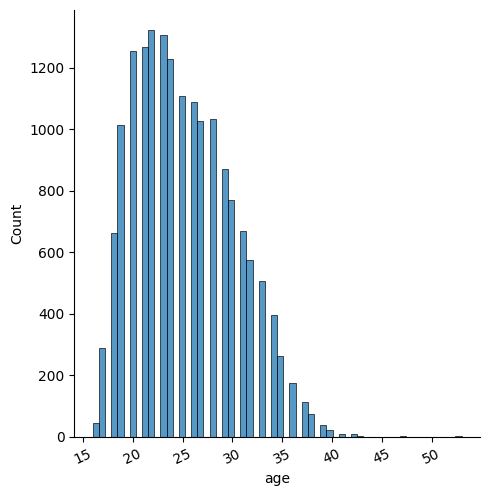

<Figure size 1000x300 with 0 Axes>

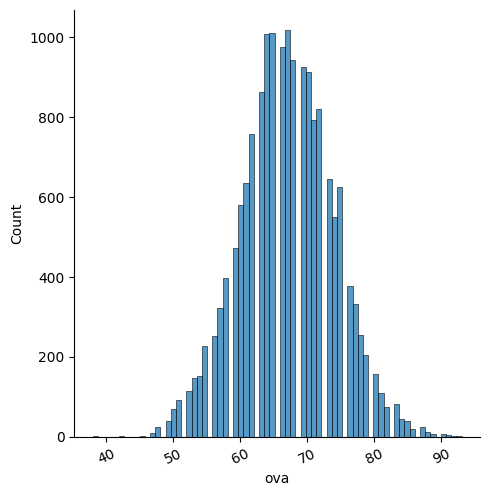

<Figure size 1000x300 with 0 Axes>

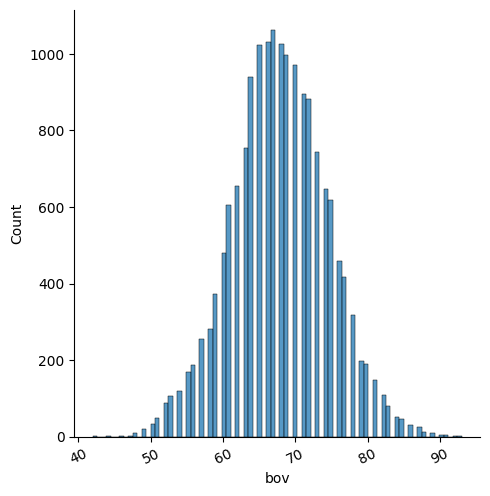

<Figure size 1000x300 with 0 Axes>

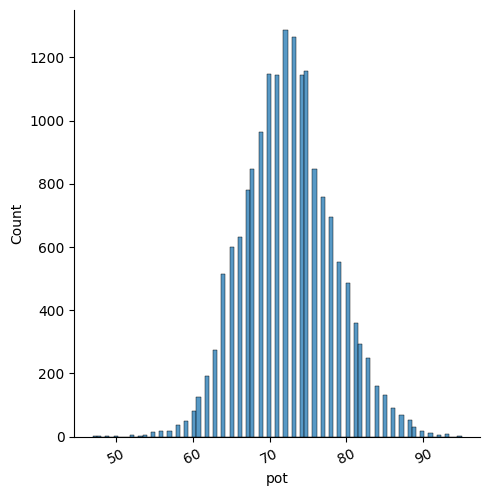

<Figure size 1000x300 with 0 Axes>

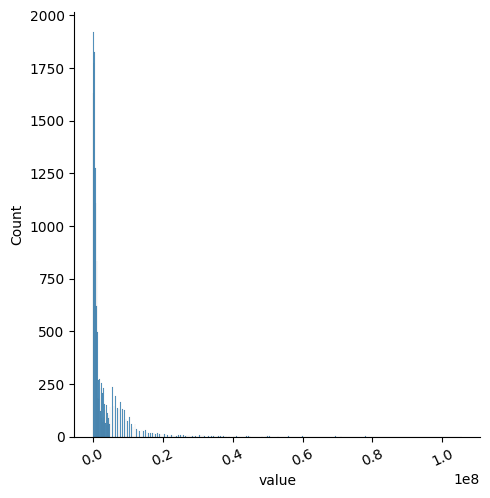

<Figure size 1000x300 with 0 Axes>

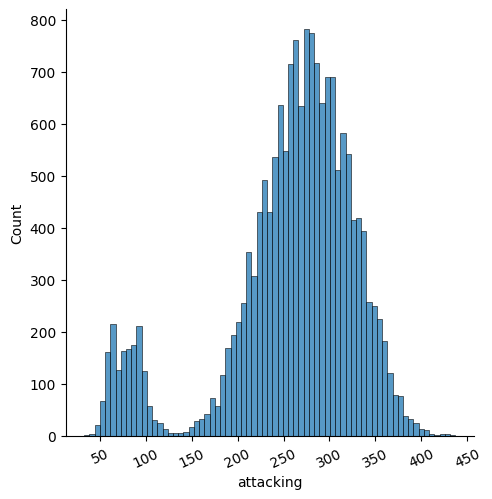

<Figure size 1000x300 with 0 Axes>

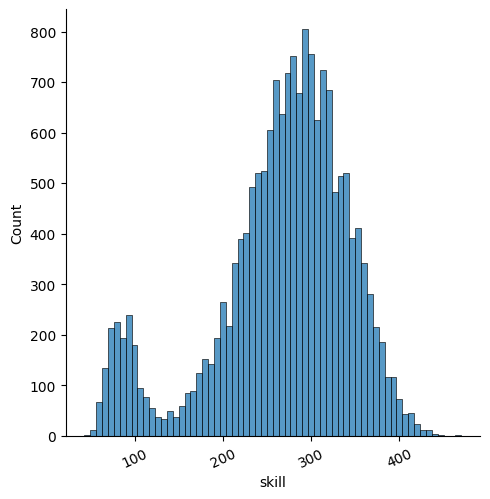

<Figure size 1000x300 with 0 Axes>

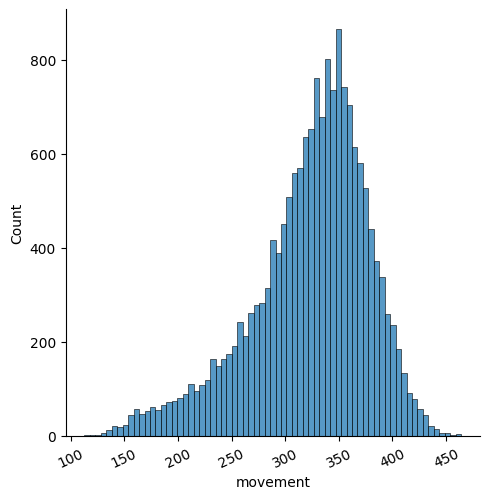

<Figure size 1000x300 with 0 Axes>

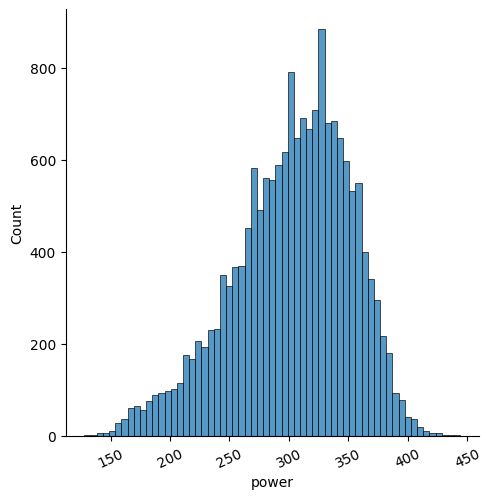

<Figure size 1000x300 with 0 Axes>

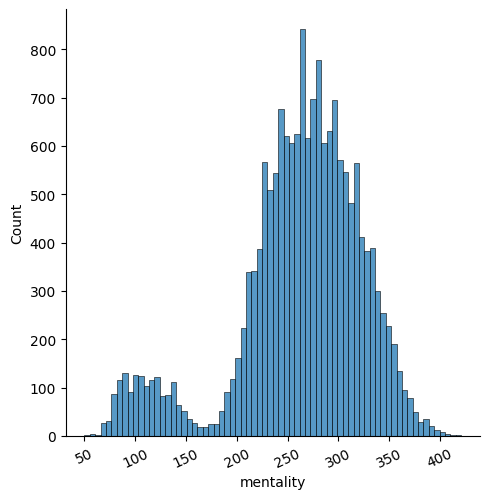

<Figure size 1000x300 with 0 Axes>

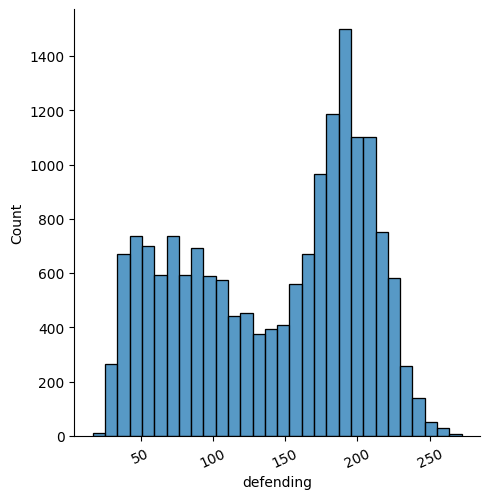

<Figure size 1000x300 with 0 Axes>

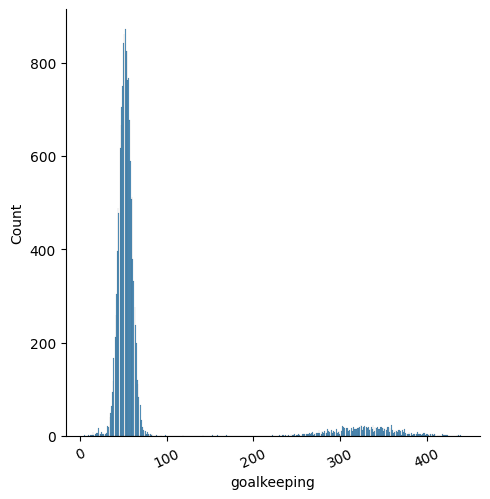

<Figure size 1000x300 with 0 Axes>

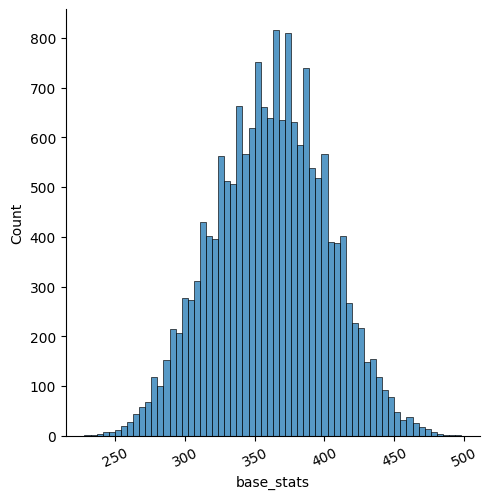

<Figure size 1000x300 with 0 Axes>

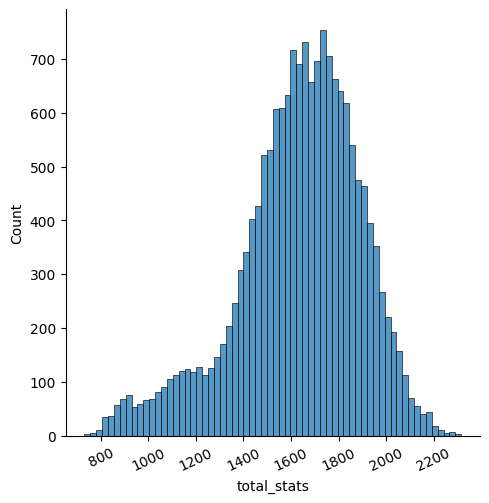

<Figure size 1000x300 with 0 Axes>

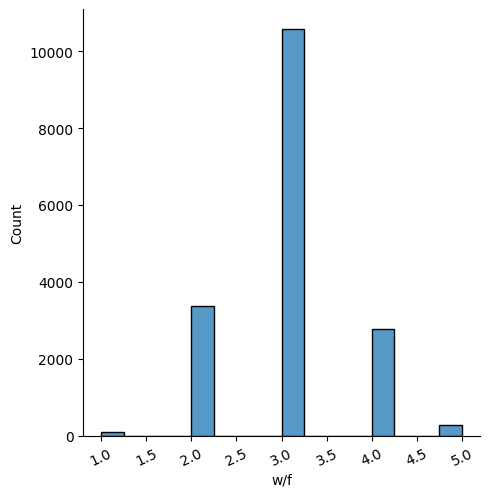

<Figure size 1000x300 with 0 Axes>

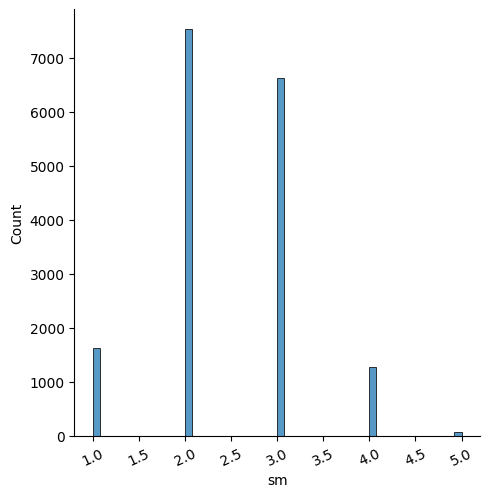

<Figure size 1000x300 with 0 Axes>

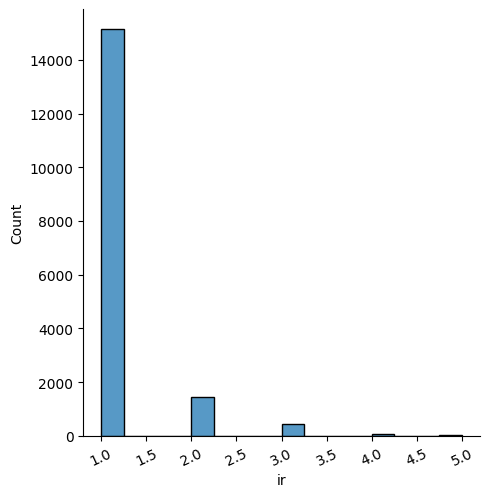

<Figure size 1000x300 with 0 Axes>

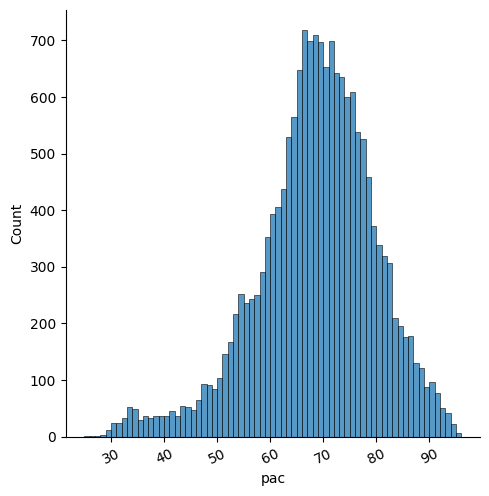

<Figure size 1000x300 with 0 Axes>

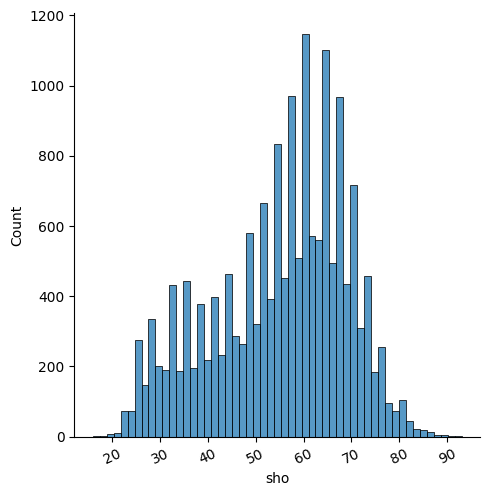

<Figure size 1000x300 with 0 Axes>

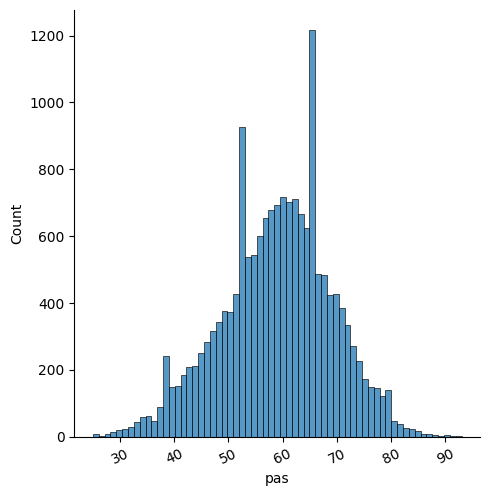

<Figure size 1000x300 with 0 Axes>

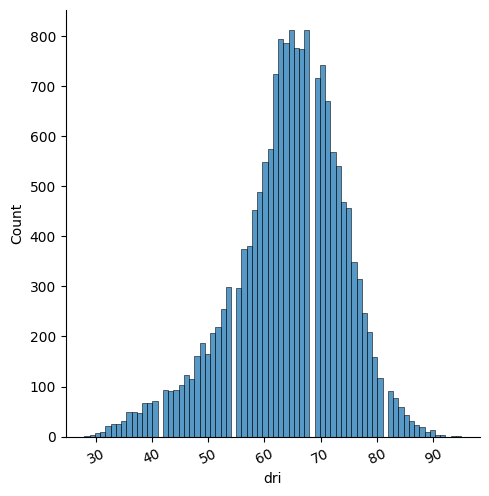

<Figure size 1000x300 with 0 Axes>

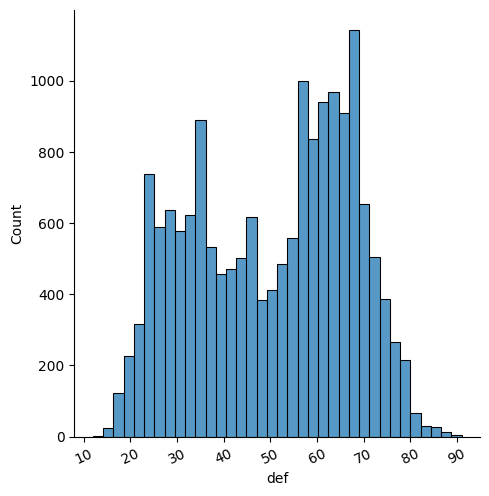

<Figure size 1000x300 with 0 Axes>

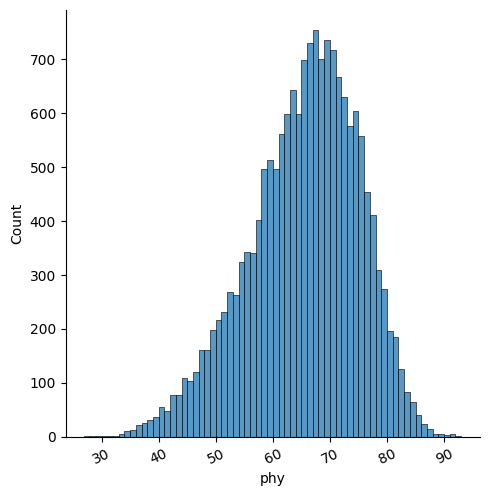

In [34]:
# Create graphs for numerical columns
for column in numeric_df.columns:
    plt.figure(figsize=(10, 3))
    sns.displot(numeric_df[column])
    plt.xticks(rotation = 25)
    plt.show();

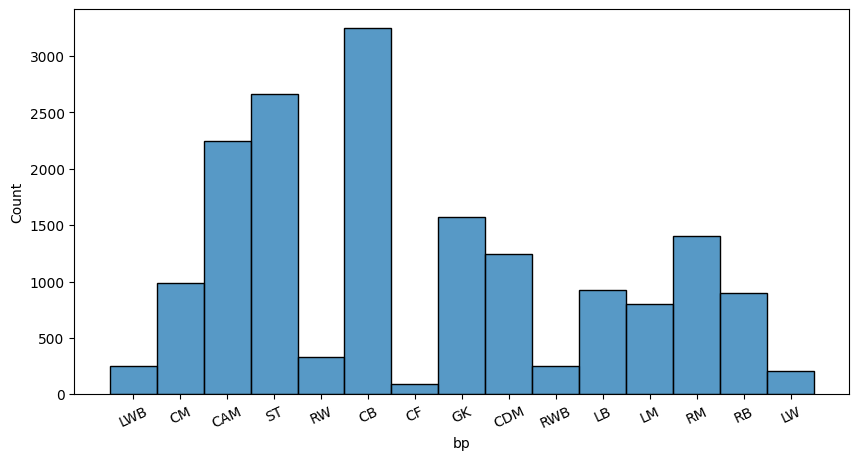

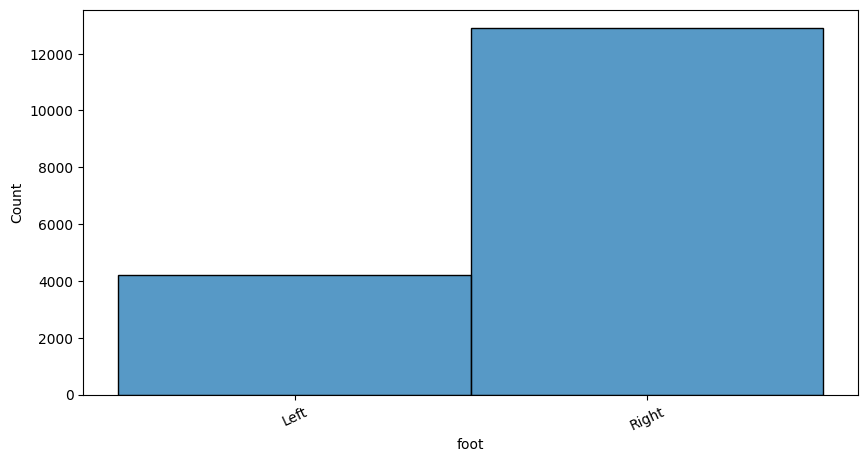

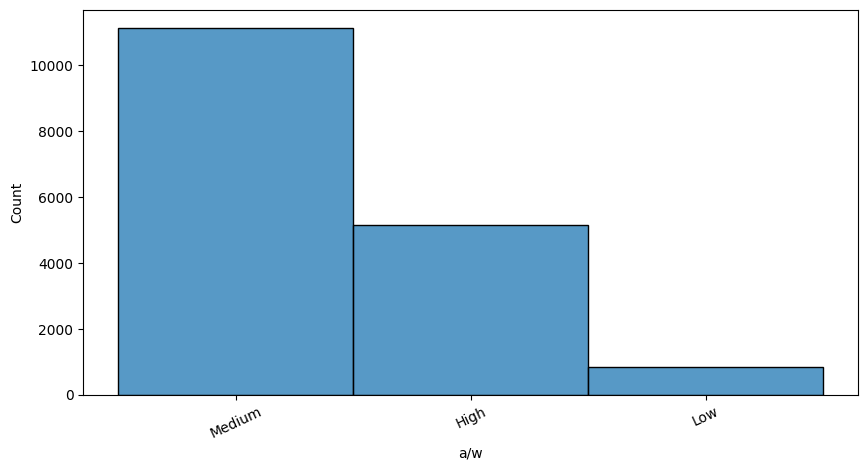

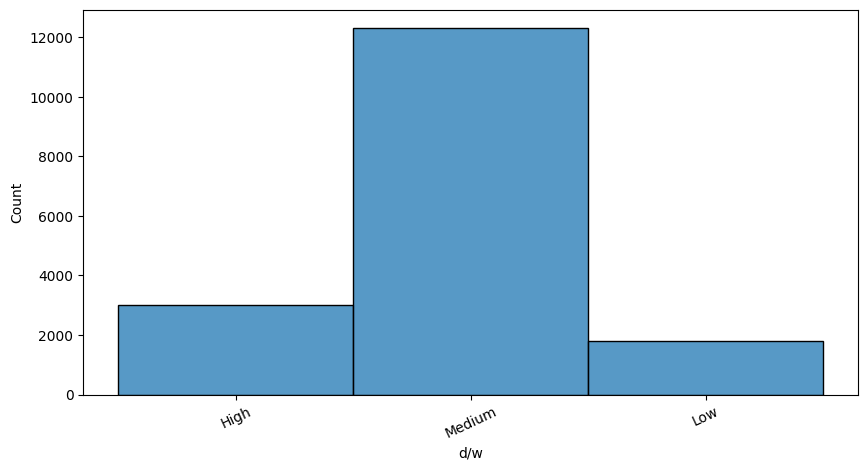

In [35]:
# Create graphs for categorical columns

for column in categorical_df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data = categorical_df[column])
    plt.xticks(rotation = 25)
    plt.show();

In [36]:
# Create instance for ordinal encoder choosing my categories
ordinal_enc = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

In [37]:
# For attack work rate I decided to apply an ordinal encoder
atack_ordinal = ordinal_enc.fit_transform(categorical_df[['a/w']])
atack_encoded_df = pd.DataFrame(atack_ordinal, columns=['a/w'])
atack_encoded_df.head(5)

,a/w
0,1.0
1,1.0
2,1.0
3,1.0
4,2.0


In [38]:
# For attack work rate I decided to apply an ordinal encoder
defense_ordinal = ordinal_enc.fit_transform(categorical_df[['d/w']])
defense_encoded_df = pd.DataFrame(defense_ordinal, columns=['d/w'])
defense_encoded_df.head(5)

,d/w
0,2.0
1,1.0
2,0.0
3,1.0
4,1.0


In [39]:
# Create a dataframe by concatenate my encoded dataframes
ordinal_encoded_df = pd.concat([atack_encoded_df, defense_encoded_df], axis=1)

In [40]:
ordinal_encoded_df.head(3)

,a/w,d/w
0,1.0,2.0
1,1.0,1.0
2,1.0,0.0


In [41]:
# For those categorical columns that doesn't need an order, I decided to use get_dummies to encoded them
one_hot_encoded_df = pd.get_dummies(data = categorical_df[['bp', 'foot']], drop_first= True)

In [42]:
one_hot_encoded_df.head(3)

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [43]:
# Create categorical dataframe with encoded info
categorical_df = pd.concat([ordinal_encoded_df, one_hot_encoded_df], axis=1)

In [44]:
categorical_df.head(3)

,a/w,d/w,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right
0,1.0,2.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,1.0,1.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2,1.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [45]:
numeric_df.head(3)

,age,ova,bov,pot,value,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,total_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy
0,33,69,71,69,625000,313,338,347,347,320,208,56,408,1929,3,2,2,71,59,70,71,68,69
1,37,71,70,71,600000,337,369,305,324,362,153,56,385,1906,4,3,1,53,69,73,69,58,63
2,33,71,71,71,1100000,337,387,295,284,317,99,51,354,1770,4,4,2,45,68,76,77,36,52


In [46]:
# Create final dataframe
full_df = pd.concat([numeric_df, categorical_df], axis = 1)

In [47]:
full_df.head(5)

,age,ova,bov,pot,value,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,total_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,a/w,d/w,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right
0,33,69,71,69,625000,313,338,347,347,320,208,56,408,1929,3,2,2,71,59,70,71,68,69,1.0,2.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,37,71,70,71,600000,337,369,305,324,362,153,56,385,1906,4,3,1,53,69,73,69,58,63,1.0,1.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2,33,71,71,71,1100000,337,387,295,284,317,99,51,354,1770,4,4,2,45,68,76,77,36,52,1.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,36,68,70,82,0,264,255,176,239,271,75,68,369,1348,3,1,1,61,66,66,69,47,60,1.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,36,81,82,81,5500000,367,408,346,297,370,181,45,420,2014,4,4,4,58,70,85,85,63,59,2.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [48]:
# Getting correlation for numeric columns
corr=numeric_df.corr()
corr

,age,ova,bov,pot,value,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,total_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy
age,1.000000,0.517099,0.456734,-0.237619,0.095981,0.183954,0.168876,-0.055642,0.310459,0.272976,0.114796,0.125933,0.414897,0.280383,0.081895,0.070940,0.403141,-0.177291,0.309438,0.396082,0.241027,0.223184,0.436462
ova,0.517099,1.000000,0.985877,0.592268,0.631679,0.431238,0.441689,0.302267,0.546417,0.495097,0.248247,0.038222,0.832618,0.607676,0.201386,0.345421,0.474492,0.201319,0.487060,0.699229,0.643427,0.344906,0.543354
bov,0.456734,0.985877,1.000000,0.628323,0.640818,0.464329,0.473888,0.335011,0.572275,0.523526,0.267770,-0.008702,0.830127,0.635037,0.212576,0.373599,0.455974,0.212889,0.478573,0.689975,0.640746,0.349906,0.535579
pot,-0.237619,0.592268,0.628323,1.000000,0.563570,0.233866,0.265503,0.258243,0.221586,0.243646,0.138748,-0.007277,0.474763,0.329178,0.137861,0.241020,0.293444,0.259294,0.244481,0.395773,0.445004,0.170562,0.159959
value,0.095981,0.631679,0.640818,0.563570,1.000000,0.289886,0.300469,0.263764,0.329969,0.306257,0.130548,0.002641,0.526843,0.393043,0.151324,0.278000,0.459631,0.210809,0.323770,0.444484,0.442156,0.172856,0.266541
attacking,0.183954,0.431238,0.464329,0.233866,0.289886,1.000000,0.928429,0.694473,0.823755,0.887838,0.313363,-0.768449,0.428602,0.903393,0.355232,0.767408,0.235135,0.180335,0.351248,0.373439,0.381863,0.106978,0.104102
skill,0.168876,0.441689,0.473888,0.265503,0.300469,0.928429,1.000000,0.726893,0.753921,0.884565,0.370467,-0.714045,0.502609,0.927913,0.355696,0.791591,0.231064,0.216382,0.327112,0.517146,0.488505,0.173771,0.028937
movement,-0.055642,0.302267,0.335011,0.258243,0.263764,0.694473,0.726893,1.000000,0.561565,0.610067,0.174809,-0.563847,0.450236,0.737742,0.282964,0.700903,0.040702,0.704176,0.229522,0.308170,0.497687,0.009569,-0.114473
power,0.310459,0.546417,0.572275,0.221586,0.329969,0.823755,0.753921,0.561565,1.000000,0.822929,0.364361,-0.572263,0.575157,0.865902,0.290717,0.584906,0.215593,0.154839,0.376257,0.360203,0.336253,0.252196,0.515286
mentality,0.272976,0.495097,0.523526,0.243646,0.306257,0.887838,0.884565,0.610067,0.822929,1.000000,0.590142,-0.727046,0.517619,0.946846,0.292446,0.661490,0.268216,0.063270,0.187264,0.409178,0.308693,0.433949,0.312012


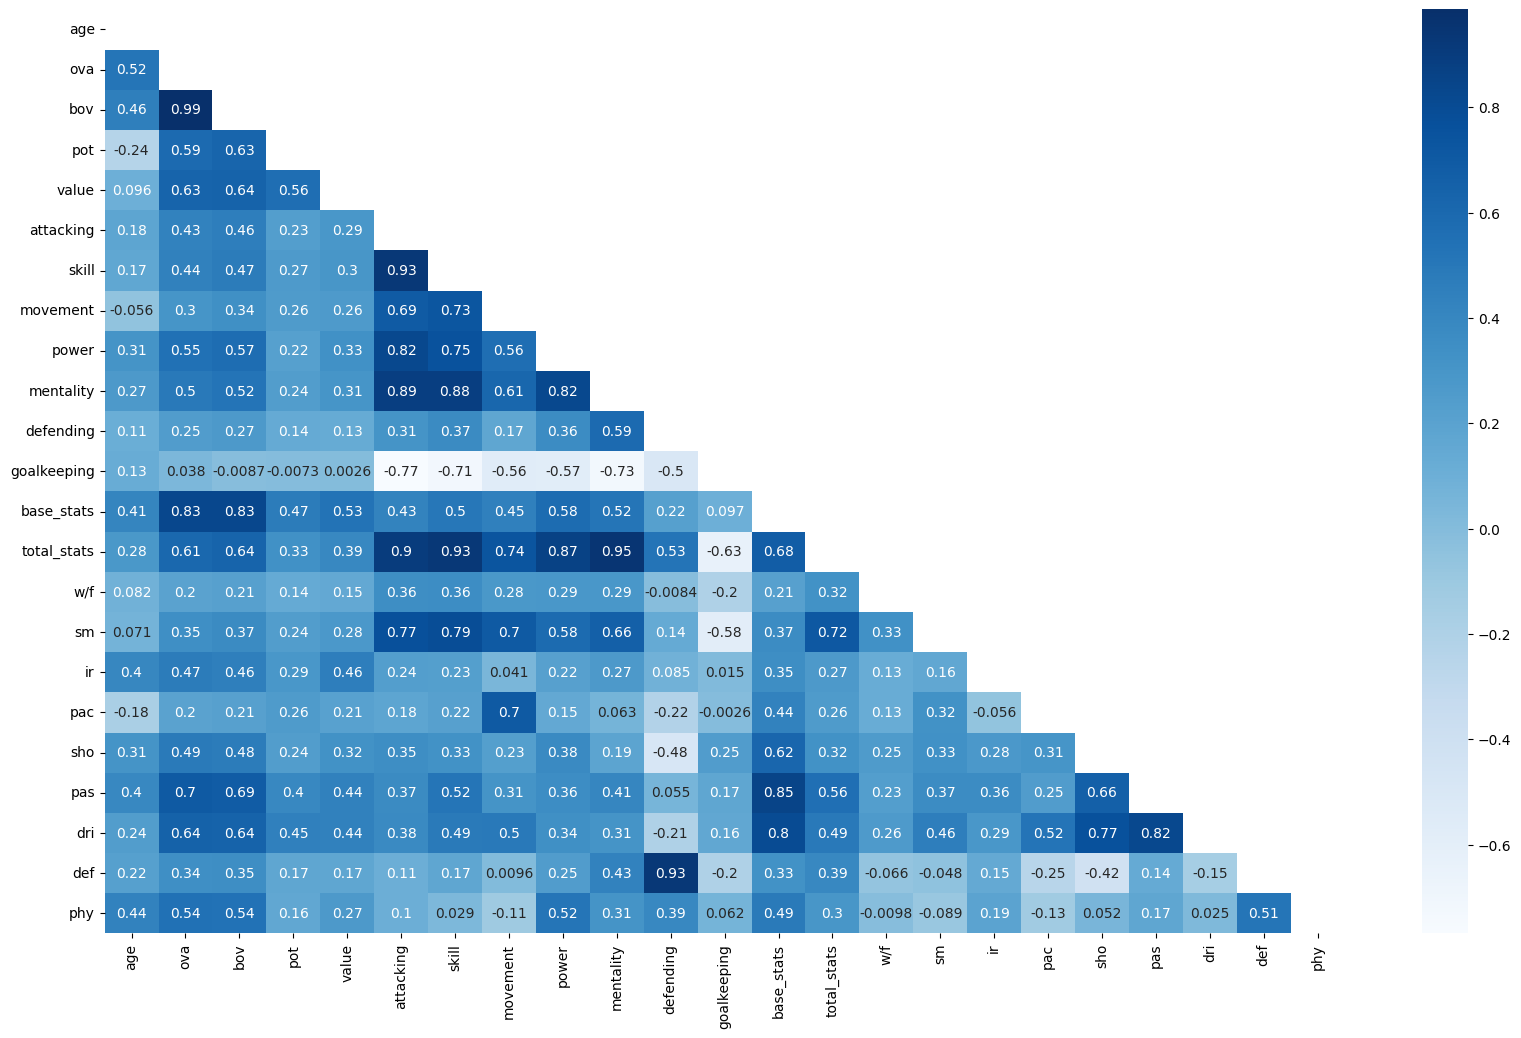

In [73]:
# Create correlation matrix
mask=np.triu(np.ones_like(corr, dtype=bool))
f, ax=plt.subplots(figsize=(20, 12))
cmap=sns.color_palette("Blues", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)
plt.show()

## Processing data

<Axes: >

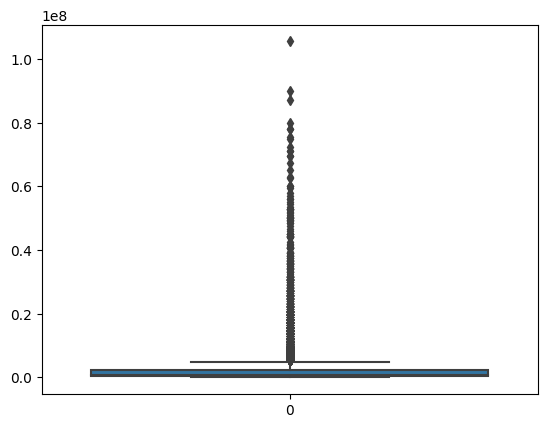

In [50]:
# Plotting target distribution
sns.boxplot(numeric_df['value'])

In [51]:
# Calculate quartiles and limits (lower and aupper)
q1=np.percentile(numeric_df['value'], 25) 
q3=np.percentile(numeric_df['value'], 75)

iqr = q3-q1 

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print(f'Interquartile value: {iqr}')
print(f'Upper limit: {upper_limit}')
print(f'Lower limit: {lower_limit}')

Interquartile value: 2025000.0
Upper limit: 5437500.0
Lower limit: -2662500.0


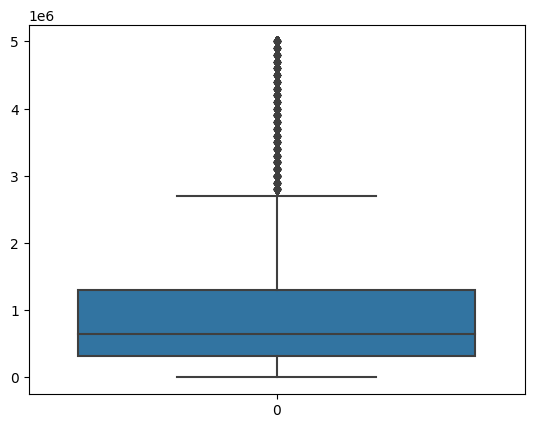

In [52]:
# Plotting target distribution without outliers
no_outliers = numeric_df[(numeric_df['value']>lower_limit) & (numeric_df['value']<upper_limit)]
sns.boxplot(no_outliers['value'])
plt.show()

<Axes: xlabel='value', ylabel='Count'>

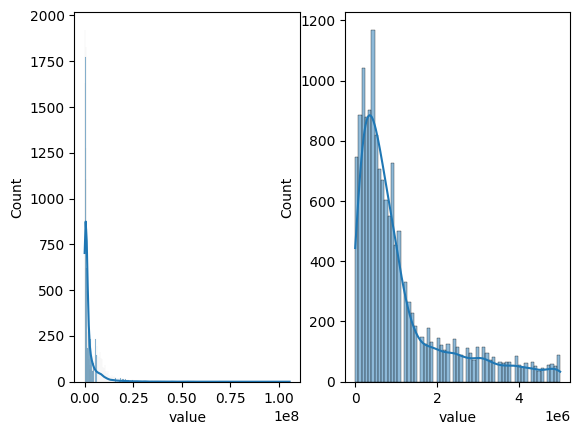

In [53]:
plt.subplot(1,2,1)
sns.histplot(numeric_df['value'], kde=True)

plt.subplot(1,2,2)
sns.histplot(no_outliers['value'], kde=True)

### Spliting data

In [54]:
# Split data into features and target
y=full_df['value']
X = full_df.drop(columns=['value'])

In [55]:
y.head(5)

0     625000
1     600000
2    1100000
3          0
4    5500000
Name: value, dtype: int64

In [56]:
X.head(5)

,age,ova,bov,pot,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,total_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,a/w,d/w,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right
0,33,69,71,69,313,338,347,347,320,208,56,408,1929,3,2,2,71,59,70,71,68,69,1.0,2.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,37,71,70,71,337,369,305,324,362,153,56,385,1906,4,3,1,53,69,73,69,58,63,1.0,1.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2,33,71,71,71,337,387,295,284,317,99,51,354,1770,4,4,2,45,68,76,77,36,52,1.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,36,68,70,82,264,255,176,239,271,75,68,369,1348,3,1,1,61,66,66,69,47,60,1.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,36,81,82,81,367,408,346,297,370,181,45,420,2014,4,4,4,58,70,85,85,63,59,2.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [57]:
# Split info for testing and training
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [58]:
print(f'X train: {X_train.shape}')
print(f'X test: {X_test.shape}')
print(f'y train: {y_train.shape}')
print(f'y test: {y_test.shape}')

X train: (12843, 39)
X test: (4282, 39)
y train: (12843,)
y test: (4282,)


## Model Validation

### Initial model validation

In [59]:
# Validate initial model
linear_regression =LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)

In [60]:
train_score = linear_regression.score(X_train, y_train)
test_score = linear_regression.score(X_test, y_test)

print(f'Test score for initial model: {test_score}')
print(f'Train score for initial model: {train_score}')

Test score for initial model: 0.5440910662753345
Train score for initial model: 0.5461232321734872


In [61]:
train_mse = mse(y_pred_train,y_train)
test_mse = mse(y_pred_test,y_test)

print(f'Test mean squared error for initial model: {test_mse}')
print(f'Train mean squared error for initial model: {train_mse}')

Test mean squared error for initial model: 14562981791890.791
Train mean squared error for initial model: 12632642703850.982


In [62]:
train_mae = mae(y_pred_train,y_train)
test_mae = mae(y_pred_test,y_test)

print(f'Test mean absolute error for initial model: {test_mae}')
print(f'Train mean absolute error for initial model: {train_mae}')

Test mean absolute error for initial model: 2074941.6907081115
Train mean absolute error for initial model: 1995501.9896720848


### Improved model validation

#### Power Transformer

In [65]:
# Create PowerTransformer instance
pt = PowerTransformer(method='yeo-johnson', standardize=True)

In [67]:
# Fit and transform train data
X_train_power_transform = pt.fit_transform(X_train)
X_test_power_transform = pt.fit_transform(X_test)

# Create dataframe
X_train_power_transform_df = pd.DataFrame(X_train_power_transform, columns=X_train.columns)
X_test_power_transform_df = pd.DataFrame(X_test_power_transform, columns=X_train.columns)

,age,ova,bov,pot,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,total_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,a/w,d/w,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right
0,0.817536,1.324821,1.078145,0.628820,1.926298,1.667602,0.637458,1.509144,1.281770,0.402689,0.248307,1.416525,1.757671,1.477435,0.718646,2.783082,-0.190629,1.680490,1.431412,1.555533,0.521337,-0.064683,-0.452734,-0.122603,-0.478903,-0.278268,-0.069649,-0.246381,-0.319562,-0.238460,-0.224647,-0.112318,-0.120229,-0.238824,-0.301319,-0.142328,-0.122541,-0.429223,0.571986
1,0.265410,-0.426398,-0.279206,-0.586566,-0.987733,-1.146158,-0.953665,-0.890532,-0.948874,0.794922,-1.188107,-1.538296,-1.073698,-1.492071,-0.554888,-0.359242,-0.962584,-1.914721,-1.439133,-2.116807,0.762794,0.374653,-2.428608,-0.122603,2.088105,-0.278268,-0.069649,-0.246381,-0.319562,-0.238460,-0.224647,-0.112318,-0.120229,-0.238824,-0.301319,-0.142328,-0.122541,-0.429223,0.571986
2,0.641590,1.032394,0.927160,0.287365,0.522780,0.992551,1.471444,0.296412,1.236198,1.089497,0.248307,1.315564,1.335217,1.477435,0.718646,-0.359242,1.804258,0.145166,0.896132,0.556700,1.065641,-0.170131,1.376151,-0.122603,-0.478903,-0.278268,-0.069649,-0.246381,-0.319562,4.193579,-0.224647,-0.112318,-0.120229,-0.238824,-0.301319,-0.142328,-0.122541,-0.429223,0.571986


In [69]:
# Validate model with transform applied
linear_regression_power_transformer = LinearRegression()
linear_regression_power_transformer.fit(X_train_power_transform_df, y_train)
y_pred_train_power_transformer = linear_regression_power_transformer.predict(X_train_power_transform_df)
y_pred_test_pt = linear_regression_power_transformer.predict(X_test_power_transform_df)

In [70]:
train_score_pt=linear_regression_power_transformer.score(X_train_power_transform_df, y_train)
test_score_pt=linear_regression_power_transformer.score(X_test_power_transform_df, y_test)

print(f'Test score for improved model: {test_score_pt}')
print(f'Train score for improved model: {train_score_pt}')

0.5982618694540569

In [74]:
train_mse_pt = mse(y_pred_train_power_transformer,y_train)
test_mse_pt = mse(y_pred_test_pt,y_test)

print(f'Test mean squared error for improved model: {test_mse_pt}')
print(f'Train mean squared error for improved model: {train_mse_pt}')

(11181480576771.414, 12952364069481.379)

In [ ]:
train_mae_pt = mae(y_pred_train_power_transformer,y_train)
test_mae_pt = mae(y_pred_test_pt,y_test)

print(f'Test mean absolute error for improved model: {test_mae_pt}')
print(f'Train mean absolute error for improved model: {train_mae_pt}')

#### Initial model numeric values only

In [78]:
X_numerical = numeric_df.drop(columns=['value'])

In [79]:
X_numerical.columns

Index(['age', 'ova', 'bov', 'pot', 'attacking', 'skill', 'movement', 'power',
       'mentality', 'defending', 'goalkeeping', 'base_stats', 'total_stats',
       'w/f', 'sm', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy'],
      dtype='object')

In [80]:
# Split info for testing and training
X_train_numeric , X_test_numeric, y_train, y_test = train_test_split(X_numerical, y, test_size=0.25, random_state=42)

In [81]:
print(f'X train: {X_train_numeric.shape}')
print(f'X test: {X_test_numeric.shape}')
print(f'y train: {y_train.shape}')
print(f'y test: {y_test.shape}')

X train: (12843, 22)
X test: (4282, 22)
y train: (12843,)
y test: (4282,)


In [82]:
# Validate initial model
linear_regression_numeric =LinearRegression()
linear_regression_numeric.fit(X_train_numeric, y_train)
y_pred_train_numeric = linear_regression_numeric.predict(X_train_numeric)
y_pred_test_numeric = linear_regression_numeric.predict(X_test_numeric)

In [83]:
train_score_numeric = linear_regression_numeric.score(X_train_numeric, y_train)
test_score_numeric = linear_regression_numeric.score(X_test_numeric, y_test)

print(f'Test score for initial model: {test_score_numeric}')
print(f'Train score for initial model: {train_score_numeric}')

Test score for initial model: 0.5395293741807623
Train score for initial model: 0.54217302631746


#### Initial model high correlated columns

In [96]:
high_corr_cols = ['age', 'ova', 'pot', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping', 'base_stats', 'w/f', 'sm', 'ir']

In [97]:
X_corr = numeric_df[high_corr_cols]

In [98]:
X_corr.columns

Index(['age', 'ova', 'pot', 'attacking', 'skill', 'movement', 'power',
       'mentality', 'defending', 'goalkeeping', 'base_stats', 'w/f', 'sm',
       'ir'],
      dtype='object')

In [99]:
X_train_corr , X_test_corr, y_train, y_test = train_test_split(X_corr, y, test_size=0.25, random_state=42)

In [100]:
print(f'X train: {X_train_corr.shape}')
print(f'X test: {X_test_corr.shape}')
print(f'y train: {y_train.shape}')
print(f'y test: {y_test.shape}')

X train: (12843, 14)
X test: (4282, 14)
y train: (12843,)
y test: (4282,)


In [101]:
# Validate initial model with high corralated columns
linear_regression_corr =LinearRegression()
linear_regression_corr.fit(X_train_corr, y_train)
y_pred_train_corr = linear_regression_corr.predict(X_train_corr)
y_pred_test_corr = linear_regression_corr.predict(X_test_corr)

In [121]:
train_score_corr = linear_regression_corr.score(X_train_corr, y_train)
test_score_corr = linear_regression_corr.score(X_test_corr, y_test)

print(f'Test score for initial model wit high corralated cols: {test_score_corr}')
print(f'Train score for initial model wit high corralated cols: {train_score_corr}')

Test score for initial model: 0.5364241620613175
Train score for initial model: 0.5392804518713201


In [122]:
X_train_corr_pt = pt.fit_transform(X_train_corr)
X_train_corr_pt_df = pd.DataFrame(X_train_corr_pt, columns=X_train_corr.columns)
X_train_corr_pt_df.head(3)

,age,ova,pot,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,w/f,sm,ir
0,0.817536,1.324821,0.628820,1.926298,1.667602,0.637458,1.509144,1.281770,0.402689,0.248307,1.416525,1.477435,0.718646,2.783082
1,0.265410,-0.426398,-0.586566,-0.987733,-1.146158,-0.953665,-0.890532,-0.948874,0.794922,-1.188107,-1.538296,-1.492071,-0.554888,-0.359242
2,0.641590,1.032394,0.287365,0.522780,0.992551,1.471444,0.296412,1.236198,1.089497,0.248307,1.315564,1.477435,0.718646,-0.359242


In [123]:
X_test_corr_pt = pt.fit_transform(X_test_corr)
X_test_corr_pt_df = pd.DataFrame(X_test_corr_pt, columns=X_train_corr.columns)
X_test_corr_pt_df.head(3)

,age,ova,pot,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,w/f,sm,ir
0,-1.418381,-1.185449,0.265104,-0.350298,-1.134336,-1.382888,-0.324576,-0.715232,-1.440877,-0.081089,-1.936108,-1.531456,-0.563927,-0.372192
1,-0.861930,-0.294332,0.768341,0.083262,0.574100,0.515363,-0.811132,0.037674,0.280074,-0.081089,-0.067673,1.473813,0.700465,-0.372192
2,-0.861930,-0.737059,-0.428261,-0.365495,-0.413793,-0.055951,-1.011060,-0.330873,0.539236,-0.830763,-0.515249,-1.531456,-0.563927,-0.372192


In [124]:
# Applying power transformer
linear_regression_corr_pt = LinearRegression()
linear_regression_corr_pt.fit(X_train_corr_pt_df, y_train)
y_pred_train_corr_pt = linear_regression_corr_pt.predict(X_train_corr_pt_df)

In [125]:
train_score_corr_pt=linear_regression_corr_pt.score(X_train_corr_pt_df, y_train)
train_score_corr_pt

0.5080730183005142

In [126]:
y_pred_test_corr_pt = linear_regression_corr_pt.predict(X_test_corr_pt_df)
test_score_corr_pt=linear_regression_corr_pt.score(X_test_corr_pt_df, y_test)
test_score_corr_pt

0.5028781024047728

#### Initial model using min max scaler

In [128]:
min_max_scaler = MinMaxScaler()

In [129]:
df_scaled = min_max_scaler.fit_transform(X_corr)
df_scaled = pd.DataFrame(df_scaled, columns=X_corr.columns)

In [132]:
y_scaled = min_max_scaler.fit_transform(full_df[['value']])

In [133]:
y_scaled = pd.DataFrame(y_scaled, columns=['value'])

In [135]:
X_train_scaler , X_test_scaler, y_train_scaler, y_test_scaler = train_test_split(df_scaled, y_scaled, test_size=0.25, random_state=42)

In [136]:
# Validate initial model using mix max scaler
linear_regression_scaler =LinearRegression()
linear_regression_scaler.fit(X_train_scaler, y_train_scaler)
y_pred_train_scaler = linear_regression_scaler.predict(X_train_scaler)
y_pred_test_scaler = linear_regression_scaler.predict(X_test_scaler)

In [138]:
train_score_scaler = linear_regression_scaler.score(X_train_scaler, y_train_scaler)
test_score_scaler = linear_regression_scaler.score(X_test_scaler, y_test_scaler)

In [139]:
print(f'Test score for initial model with min max scaler: {test_score_sacler}')
print(f'Train score for initial model with min max scaler:: {train_score_scaler}')

Test score for initial model: 0.5364241620613177
Train score for initial model: 0.5392804518713203


## Conclusion

* With the data that I considered usefull for my analysis, my model is not good enough, it has an improve when I apply power transformer on it but with any other tranformation I have a downgrade on performance. I've tried applying min max scaler, using only those columns with a high correlation with my target but I didn't get the desire result.